Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
%matplotlib inline
import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

from plot_prob import plot_samples_continuous, \
    dibuja_normal, \
    dibuja_distribucion_empirica, \
    plot_normals,\
    plot_exponentials

En esta hoja veremos una primera aproximación a las distribuciones de probabilidad continuas.

## Distribuciones de probabilidad continuas

En una distribución de probabilidad **continua**, el resultado de una extracción aleatoria no es necesariamente un número entero, sino que puede ser cualquier número real. Por tanto, no podemos comparar el resultado de una extracción aleatoria contra una tabla de valores, y es *casi seguro* que no extraeremos nunca el mismo valor dos veces.

A veces usamos las distribuciones continuas para aproximar funciones discretas, pero que pueden tomar muchos valores. Por ejemplo, las ganancias (o pérdidas) al jugar muchas veces a un mismo juego de azar no son estrictamente una distribución continua, porque los céntimos de euro son indivisibles, pero se distribuyen de forma muy aproximada según una distribución gaussiana.

Como el resultado puede ser cualquier número real, con precisión infinita, nunca ocurrirá que el valor sea exactamente 0, 0.5, 1.

Por tanto, no podemos calcular la probabilidad de que X tome ciertos valores sumando las probabilidades de los puntos individuales y hacemos otra cosa:

 - 1) Definimos una **función de densidad** $f:\mathbb{R}\rightarrow\mathbb{R}^+$ tal que:
$$
\int_{\mathbb{R}} \;f(x)\:dx = 1
$$
En el caso de la distribución Normal(0,1), la función de densidad es:
$$
f(x) = {\displaystyle {\frac {1}{\sqrt {2\pi }}}e^{-{\frac {x ^{2}}{2}}}}
$$
*La **función de densidad** debe satisfacer:*
 - **es siempre positiva**
 - **su integral sobre todos los números reales es 1**.

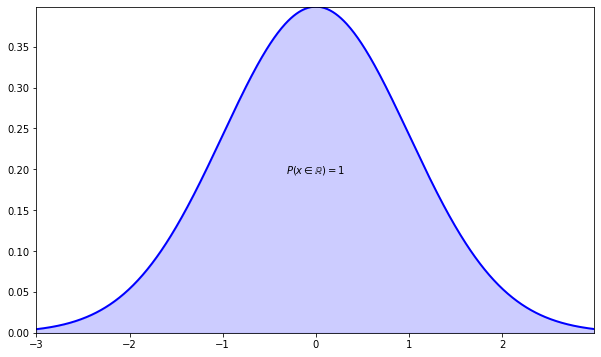

In [2]:
dibuja_normal(0,1)

 - 2) Definimos la probabilidad de que $X$ pertenezca a un conjunto $A\subset\mathbb{R}$ como
$$
P(X\in A)=\int_{A} \;f(x)\:dx
$$
Si $I=[a,b]$ es un intervalo:
$$
P(X\in I)=\int_{I} \;f(x)\:dx=\int_{a}^b \;f(x)\:dx
$$
Es el **área bajo la curva**, que sabéis que se puede calcular *integrando la función de densidad*.

*Como la función de densidad*:
 - **es siempre positiva** => *las probabilidad son siempre mayores o iguales que cero*.
 - **su integral sobre todos los números reales es 1** => *la probabilidad del evento total $x\in\mathbb{R}$ es 1*.

Además, si tenemos dos conjuntos disjuntos ($A\cap B=\emptyset$):
$$
\begin{align}
P(X\in A\cup B)&=\int_{A\cup B} \;f(x)\:dx \\
&=\int_{A} \;f(x)\:dx + \int_{B} \;f(x)\:dx \\
&=P(X\in A) + P(X\in B)
\end{align}
$$
Por tanto, *cualquier función de densidad positiva, y con integral 1 define una distribución de probabilidad continua*.

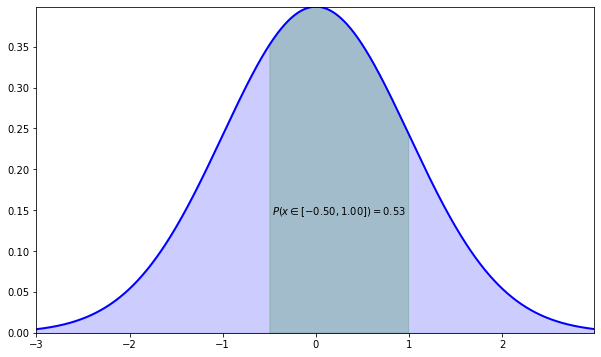

In [3]:
# NO DEJES DE PROBAR A CAMBIAR LOS VALORES
dibuja_normal(0,1,-0.5,1)

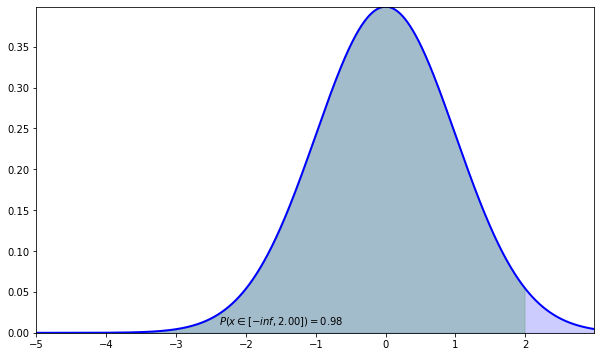

In [4]:
# NO DEJES DE PROBAR A CAMBIAR LOS VALORES
dibuja_normal(0,1,-np.inf,2)

### Gaussiana (distribución normal)

Es la familia de distribuciones de probabilidad más importante (después veremos por qué).

Es una familia que depende de dos parámetros:

 - $\mu$, la **media**.
 - $\sigma$, la **desviación típica**. Tiene que ser positiva.

La podemos escribir

 - $N(\mu, \sigma)$ (y leemos "la normal con media $\mu$ y desviación típica $\sigma$")
 - $N(\mu, \sigma^2)$ (y leemos "la normal con media $\mu$ y varianza $\sigma^2$")

Los posibles valores son todos los números reales, pero valores muy superiores, o muy inferiores, a la media son muy poco probables.

Vamos a probar a modificar los dos parámetros para ver el efecto de cada cual (traslación y dilatación).

Puedes encontrar más información sobre la [distribución gaussiana en la wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)

La **función de densidad** de $N(\mu, \sigma)$ es:
$$
f(x) = {\displaystyle {\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}
$$
 - La media es $\mu$
 - La desviación típica es $\sigma$
 - La varianza es $\sigma^2$

¿Qué significan los parámetros?

Prueba a cambiarlos en el dibujo de la función de densidad de la normal... ¿qué ocurre?

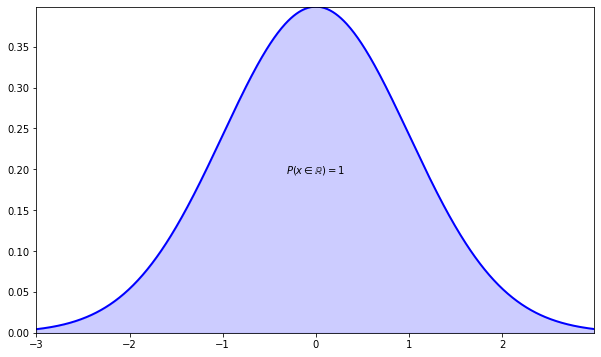

In [5]:
dibuja_normal(0,1)

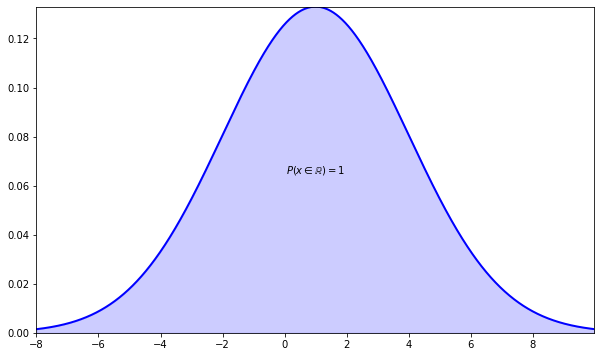

In [6]:
dibuja_normal(1,3)

Es más fácil comparar si dibujamos las funciones de densidad de varias normales distintas en la misma gráfica.

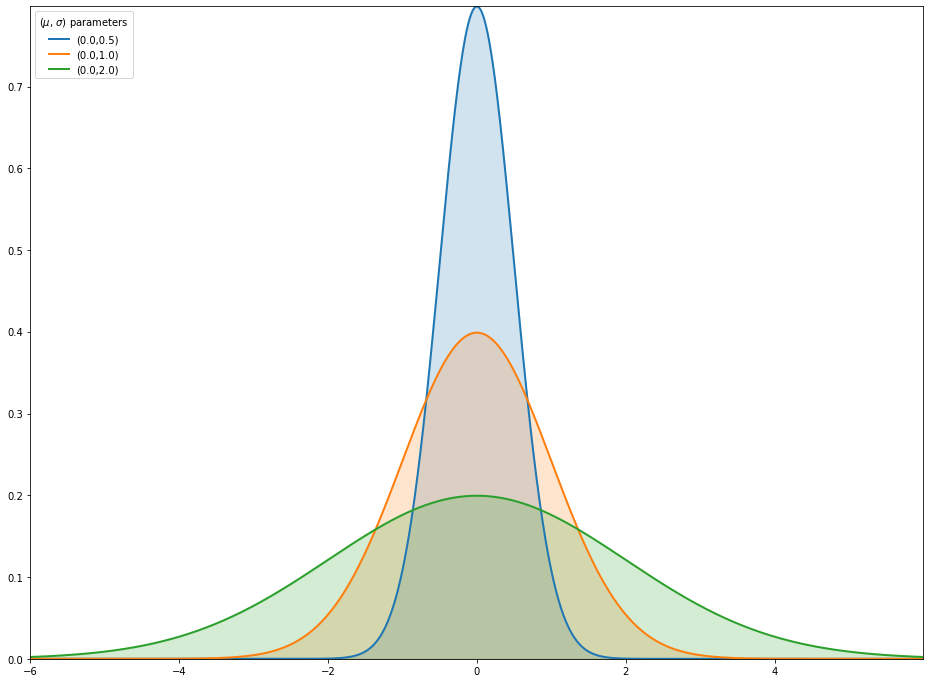

In [7]:
#Misma media, distinta desviación típica
PARAMS = [(0,.5), (0,1), (0,2)]
plot_normals(PARAMS)

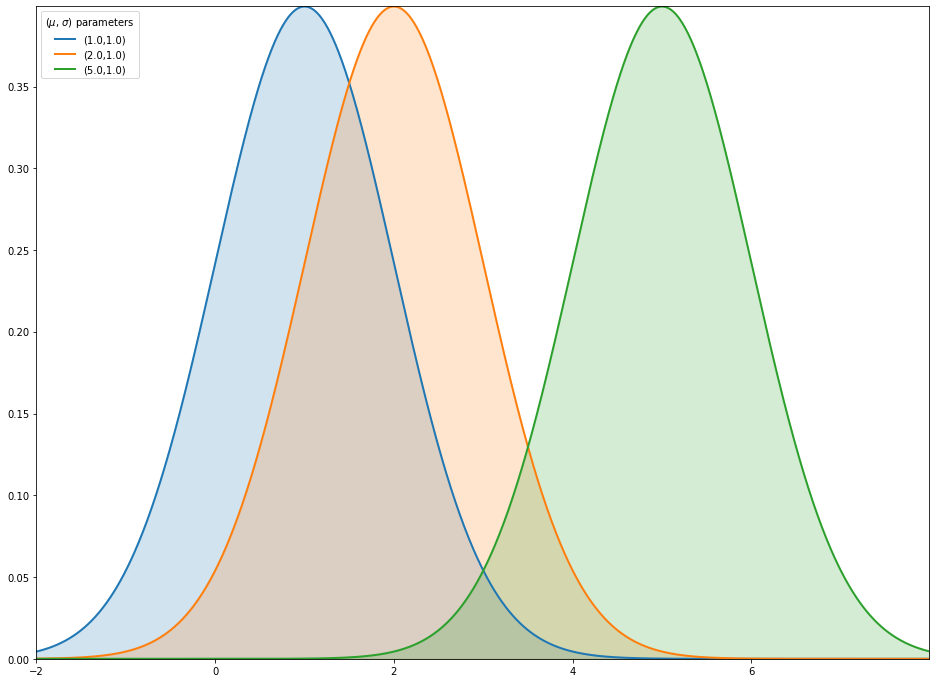

In [8]:
#Misma desviación típica, distinta media
PARAMS = [(1,1), (2,1), (5,1)]
plot_normals(PARAMS)

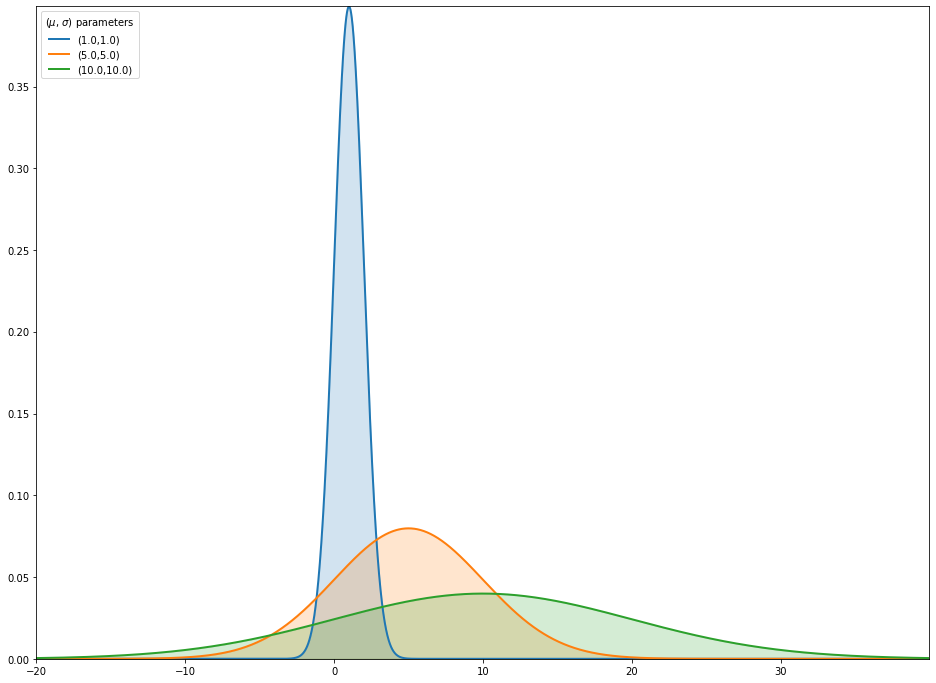

In [9]:
PARAMS = [(1,1), (5,5), (10,10)]
plot_normals(PARAMS)

**Ejemplo**:

  - En la población A la media de altura es 170cm y la desviación típica es de 20 cm.
  - En la población B la media de altura es 180cm y la desviación típica es de 10 cm.
 
**Pregunta**:

  - ¿Cuál es la proporción de personas en cada población que miden más de 190cm?
  - ¿Cuál es la proporción de personas en cada población que miden más de 200cm?

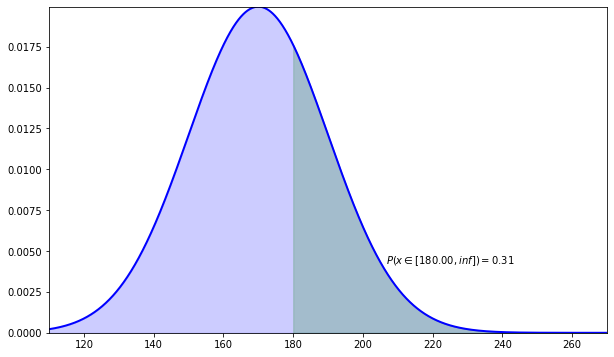

In [10]:
dibuja_normal(170,20,180,np.inf)

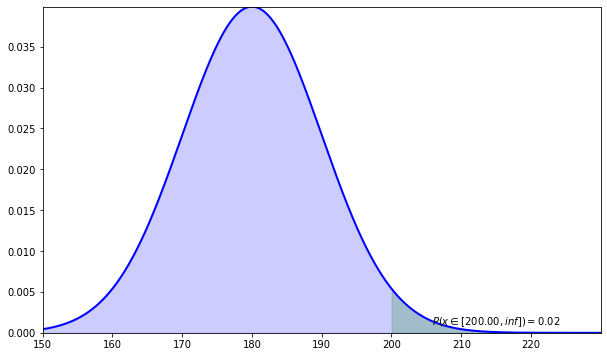

In [11]:
dibuja_normal(180,10,200,np.inf)

In [12]:
#P(X > 200) = 1 - P(X <= 200)
N = st.norm(loc=180, scale=10)
1 - N.cdf(200)

0.02275013194817921

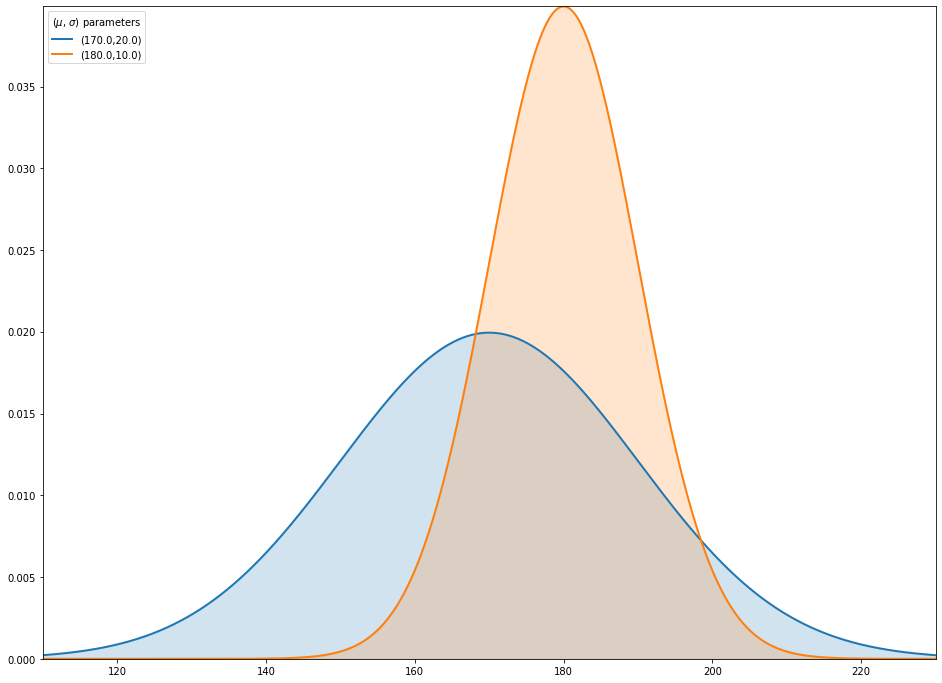

In [13]:
plot_normals([(170,20), (180,10)])

### Función de distribución
Recordemos que hemos definido la probabilidad de que $X$ pertenezca a un conjunto $A\subset\mathbb{R}$ como
$$
P(X\in A)=\int_{A} \;f(x)\:dx
$$

Es el **área bajo la curva**, que sabéis que se puede calcular *mediante una **primitiva** de la función de densidad*.

Definimos la **función de distribución** $F$ como esta primitiva concreta:
$$
F(x) = \int_{-\infty}^x \;f(t)\:dt
$$
Ahora podemos calcular la probabilidad de un intervalo $I=[a,b]$ de esta forma:
$$
P(X\in I)=\int_{I} \;f(x)\:dx=\int_{a}^b \;f(x)\:dx = F(b) - F(a)
$$

En la librería scipy.stats, si N es una distribución **continua**:
 - ``N.pdf(x)`` es la función de densidad evaluada en x (probability density function)
 - ``N.cdf(x)`` es la función de densidad evaluada en x (cumulative distribution function)

**Ejercicio**:
  - En la población A la media de altura es 170cm y la desviación típica es de 20 cm.
  - En la población B la media de altura es 180cm y la desviación típica es de 10 cm.

Responde a las siguientes preguntas **usando la función de distribución** ``N.cdf``:

  - ¿Cuál es la proporción de personas en cada población que miden menos de 160cm?
  - ¿Cuál es la proporción de personas en cada población que miden menos de 190cm?
  - ¿Cuál es la proporción de personas en cada población que miden más de 200cm?  

In [14]:
N = st.norm(loc=170, scale=20)


## Histogramas de distribuciones de probabilidad continuas

Para distribuciones continuas no podemos comparar los números de la muestra con un conjunto discreto. Tenemos que hacer cajas, que son arbitrarias: podemos hacer cajas de longitud 1, 2, 0.1, 0.01 ... y tenemos que meter cada número real de la muestra dentro de la caja que corresponda.

In [15]:
mean = 10
std = 5
N = st.norm(loc=mean,scale=std)

Ahora no dibujamos la probabilidad de que el número extraído sea 1, 2, etc. *La probabilidad de obtener un número concreto es 0 (imposible)*.

Para las funciones de distribución continuas no usamos la función de masa, sino la **función de densidad** de probabilidad.

Vamos a empezar por dibujar el histograma de una muestra grande, pero con pocas cajas.

In [16]:
plt.hist?

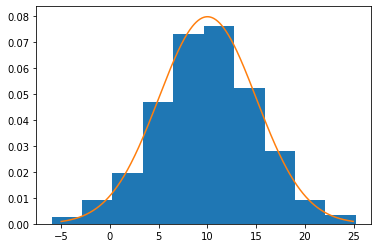

In [17]:
plt.hist(N.rvs(1000), density=1)
#Dibujamos la función de densidad de probabilidad
xs = np.arange(mean-3*std,mean+3*std,std*0.01)
ys = N.pdf(xs)
plt.plot(xs,ys)
plt.show()

Atencion porque el numero de cajas cambia el aspecto del histograma. En las gráficas siguientes, la muestra es exactamente la misma, pero han cambiado las cajas:

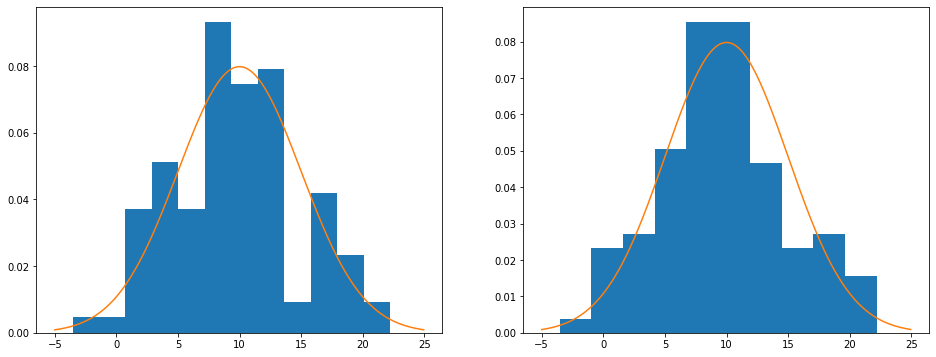

In [18]:
#generamos un unica muestra, con la misma semilla aleatoria
muestra = N.rvs(100, random_state=15)
xs = np.arange(mean-3*std,mean+3*std,std*0.01)
ys = N.pdf(xs)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
ax1,ax2 = axes
#La dibujamos con 12 cajas
ax1.hist(muestra, density=1, bins =12)
ax1.plot(xs,ys)
#La dibujamos con 10 cajas
ax2.hist(muestra, density=1, bins =10)
ax2.plot(xs,ys)
plt.show()

Dibujamos histogramas de muestras cada vez más grandes, primero con pocas cajas y después con muchas cajas.

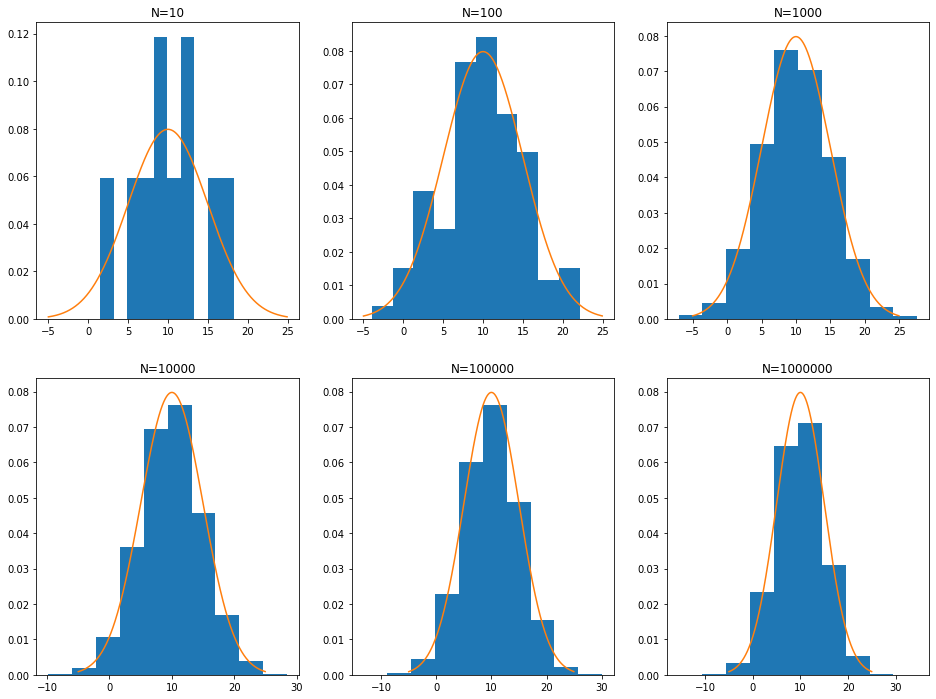

In [19]:
NBINS=10
sizes = [10**j  for j in range(1,7)]
#samples es una lista de tuplas 
#   (tamaño 'size', muestra aleatoria de N de tamaño 'size')
samples = [(size, N.rvs(size)) for size in sizes]
plot_samples_continuous(samples, N, nbins=NBINS)

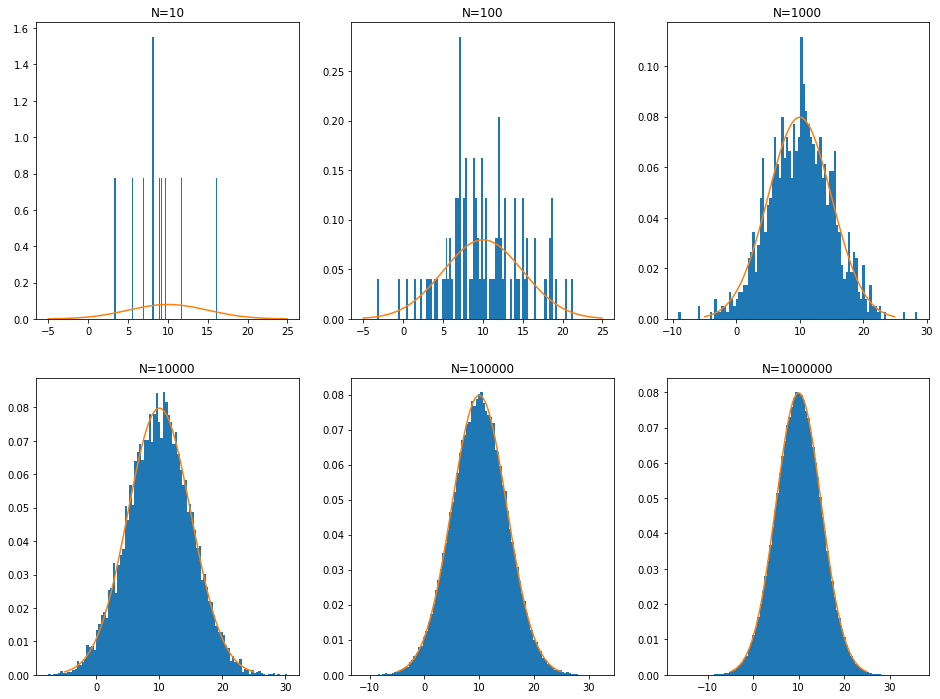

In [20]:
NBINS=100
sizes = [10**j  for j in range(1,7)]
samples = [(size, N.rvs(size)) for size in sizes]
plot_samples_continuous(samples, N, nbins=NBINS)

### Función de distribución empírica

Sin embargo, las funciones de distribución se aproximan mucho mejor por las **funciones de distribución empíricas**.

Si ``xs`` es una muestra, la *función de distribución empírica de la muestra* ``xs``, se define como
$$
{\displaystyle {\widehat {F}}_{n}(t)={\frac {{\mbox{numero de elementos en la muestra}}\leq t}{n}}={\frac {1}{n}}\sum _{i=1}^{n}\mathbf {1} _{x_{i}\leq t},}
$$

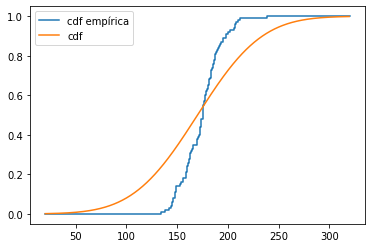

In [21]:
N1 = st.norm(170,20)
N2 = st.norm(170,50)
muestra = N1.rvs(100)
#Comparamos la muestra aleatoria de N1 con la cdf de N2

dibuja_distribucion_empirica(muestra,N2)

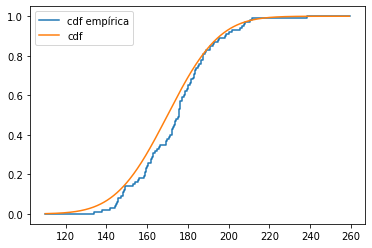

In [22]:
dibuja_distribucion_empirica(muestra,N1)

El [teorema de Glivenko-Cantelli](https://en.wikipedia.org/wiki/Glivenko%E2%80%93Cantelli_theorem) demuestra que la función de distribución empírica converge a la función de distribución cuando el tamaño de la muestra crece.

### Ejemplo: cambio de escala de una variable normal

Las variables aleatorias normales tienen una *propiedad importante*:

> Si $X$ sigue una Normal($\mu, \sigma$) => $aX+b$ sigue una Normal($a\mu+b,a\sigma$)

En particular:

> - Si $X$ sigue una Normal($\mu, \sigma$) => $\frac{X-\mu}{\sigma}$ sigue una Normal(0,1)

> - Si $X$ sigue una Normal(0,1) => $X\sigma + \mu$ sigue una Normal($\mu, \sigma$)



Vamos a comprobarlo numéricamente:

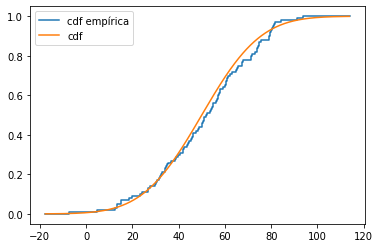

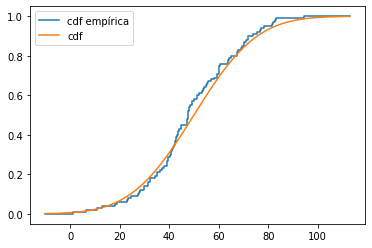

In [23]:
mean = 50
std  = 20

#Muestra de Normal(mean, std)
N = st.norm(loc=mean, scale=std)
muestra1 = N.rvs(100)

#Muestra de Normal(0,1), pero escalada
N01 = st.norm(loc=0, scale=1)
muestra2 = mean + std*N01.rvs(100)

dibuja_distribucion_empirica(muestra1,N)
dibuja_distribucion_empirica(muestra2,N)

## Distribución exponencial

La distrubución exponencial es una distribución de probabilidad continua que sólo toma valores positivos.

Depende de un sólo parámetro:

 - $\lambda$: la **tasa** (**firing rate**), que en realidad es la misma tasa que vimos al estudiar la distribución de Poisson.

La distribución exponencial mide un aspecto diferente del proceso de Poisson: si la distribución de Poisson mide la distribución del número de eventos observados en un intervalo de tiempo, la distribución exponencial mide el tiempo entre dos eventos:

 - el número de eventos en un intervalo tiene que ser un número entero => la distribución de Poisson es discreta.
 - el tiempo entre dos eventos puede ser cualquier número real positivo => la distribución exponencial es continua.
 
Por tanto, la distribución de Poisson y la exponencial son dos caras de la misma moneda.

La **función de densidad** de $Exp(\lambda)$ es:
$$
f(x) = \lambda e^{-\lambda x}
$$
 - La media es $\frac{1}{\lambda}$
 - La desviación típica es $\frac{1}{\lambda}$
 - La varianza es $\frac{1}{\lambda^2}$

In [24]:
#Atencion, para fijar el parametro de la distribucion exponencial
#no se puede introducir la tasa directamente, hay que fijar el
#parametro "mean" o "scale"

E = st.expon(scale=1/100)
E.mean(), E.std(), E.var()

(0.01, 0.01, 0.0001)

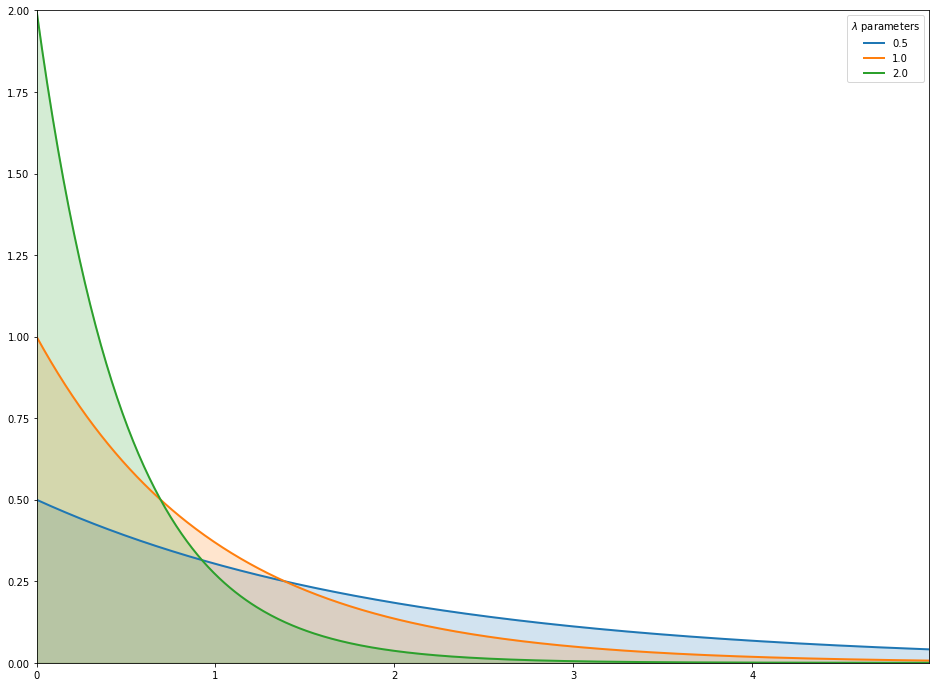

In [25]:
plot_exponentials([0.5,1,2])

### Ejercicio 8 de la hoja
Se estima que la vida útil (hasta la rotura) de un tipo de componente electrónico sigue una distribución exponencial con valor esperado de 8 años. Se pide:
 - Calcular la probabilidad de que un elemento tenga una vida entre 3 y 12 años.
 - Calcular el percentil 95 de la distribución (tiempo en el que la probabilidad acumulada es del 95\%)
 - Calcular la probabilidad de que un elemento que ha durado ya 10 años, dure más de 25.

In [26]:
E = st.expon(scale=8)
E.cdf(12) - E.cdf(3)

0.4641591186425424

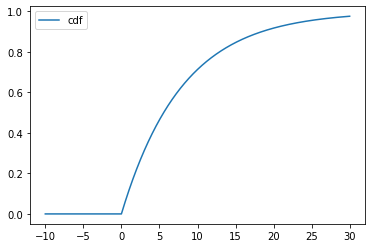

In [27]:
xs = np.arange(-10,30,0.01)
ys = E.cdf(xs)
plt.plot(xs,ys, label = 'cdf')
plt.legend()
plt.show()

Calculamos los percentiles mediante la función `ppf` (percentile point function).

In [28]:
E.ppf(.95)

23.96585818843192

In [29]:
#probabilidad de que un elemento que ha durado ya 10 años, dure más de 25.
(1 - E.cdf(25))/(1-E.cdf(10))

0.15335496684492855

In [30]:
#compara con la probabilidad de que un elemento nuevo, dure más de 15 años.
1 - E.cdf(15)

0.15335496684492844

## Glosario en inglés

 - **función de densidad**: *density function*
 - **función de distribución**: *cumulative distribution function*
 - **función de distribución empírica**: *empirical cumulative distribution function*
 - **histograma**: *histogram*

### Ejercicio 1

La medida de intensidad de corriente en un hilo de cobre sigue una distribución normal con media $10 mA$ y varianza $4 mA^2$.

 - a) Calcular la probabilidad de que la medida sea mayor de $13 mA$.
 - b) Calcular la probabilidad de que la medida esté entre $9$ y $11 mA$.

### Ejercicio 2

En una población A la media de altura es 170cm y la desviación típica es de 20 cm.

Si tenemos trajes que siven para personas entre 160 y 190 cm: ¿cuál es la proporción de gente a la que no le sirven nuestros trajes?

### Ejercicio 3

- Investiga la **distribución uniforme continua**. Busca esta distribución es la wikipedia y scipy.stats.
- Representa la función de densidad y la función de distribución de la Uniforme(0,1) y de la Uniforme(-2,2). Calcula la esperanza y varianza de cada una de ellas.

### Ejercicio 4

La función de densidad de probabilidad del tiempo de fallo en horas de los componentes electrónico en una fotocopiadora sigue una distribución exponencial:
$$
f(x)=\frac{e^{-x/1000}}{1000}  \qquad x> 0
$$
Determinar la probabilidad de que:

 - Un componente dure más de 3000 horas antes de fallar.
 - Un componente falle dentro de un periodo entre 1000 y 2000 horas.
 - El número de horas $T_{10}$ en que la probabilidad acumulada de fallo de un componente sea superior a 0.1.

### Ejercicio 5

- Si $X_1$ y $X_2$ siguen distribuciones uniformes continuas Uniforme(-2,2), pero son independientes, simula extracciones aleatorias de $X=X_1+X_2$ y dibuja el resultado.
- Conjetura cómo es la distribución de probabilidad de X.
- **extra** ¿serás capaz de encontrar buscando en internet el nombre de esta distribución de probabilidad?

### Ejercicio 6 (opcional)

Escribe una función aleatoria que haga lo siguiente:

 - Recibe dos parámetros reales:
     - T, que representa la longitud de un intervalo
     - $\lambda$, que representa la tasa de disparo de un proceso de Poisson.
 - Calcula el *tiempo $t_1$ hasta el primer disparo* de un proceso de Poisson con tasa $\lambda$ (haciendo una extracción de una distribución $Exponencial(\lambda)$).
 - Si el tiempo $t_1$ es **mayor** que T, devuelve **0** observaciones en el intervalo [0,T]
 - Si el tiempo $t_1$ es **menor** que T, calcula el intevalo $t_2$ entre el primer y el segundo disparo, haciendo una extracción de una distribución $Exponencial(\lambda)$.
 - Si el tiempo $t_1+t_2$ es **mayor** que T, devuelve **1** observación en el intervalo [0,T].
 - Continúa de este modo, observa que es posible que el resultado sea cualquier número natural arbitrariamente grande.
 - Compara el resultado con una extracción de una distribución de Poisson con tasa $\lambda\cdot T$.